In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Question 1 <br>
Part (i)

In [2]:
# load the data set
data = pd.read_csv("Dataset3.csv",header=None)
data.columns = ['x','y']
X = data.values

Text(0, 0.5, 'Y')

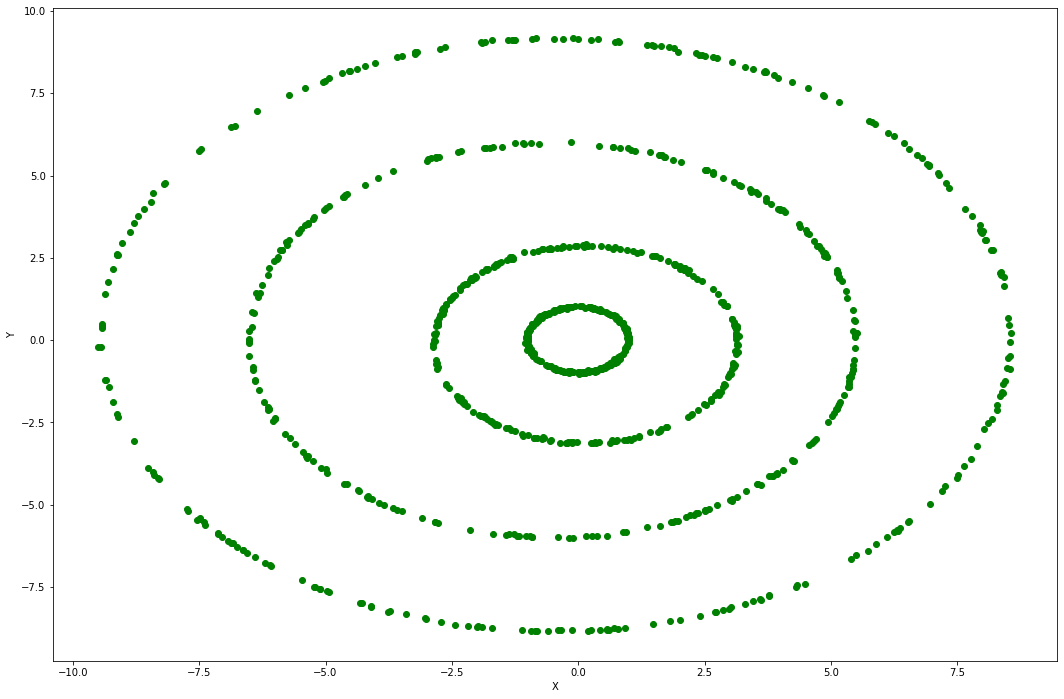

In [3]:
plt.figure(figsize=(18,12))
plt.scatter(X[:,0],X[:,1],c='g')
plt.xlabel("X")
plt.ylabel("Y")

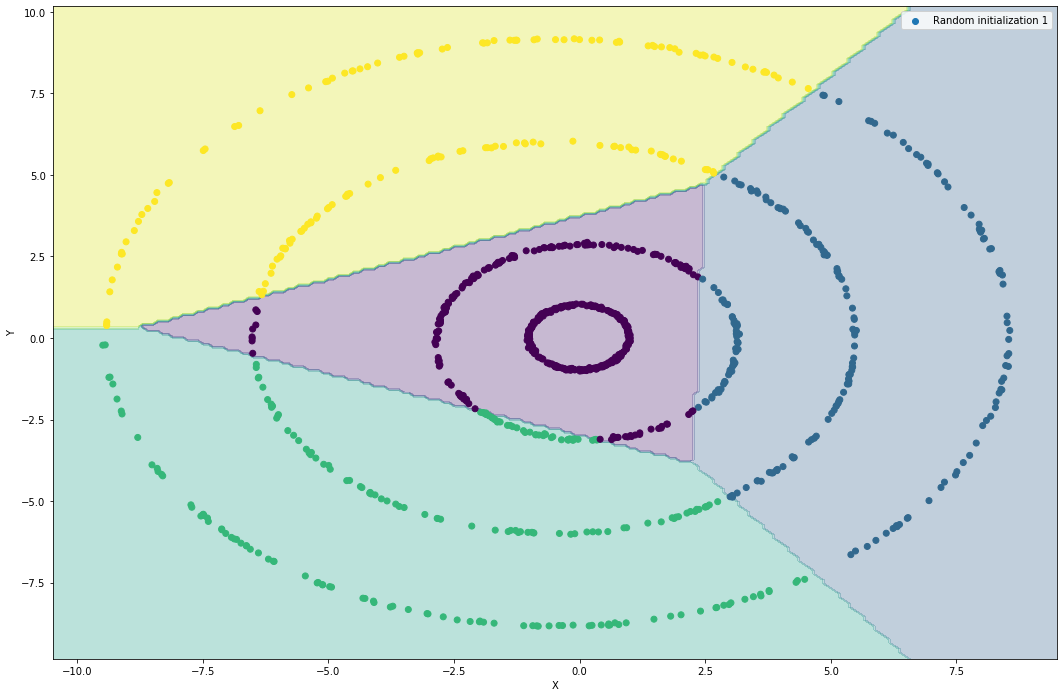

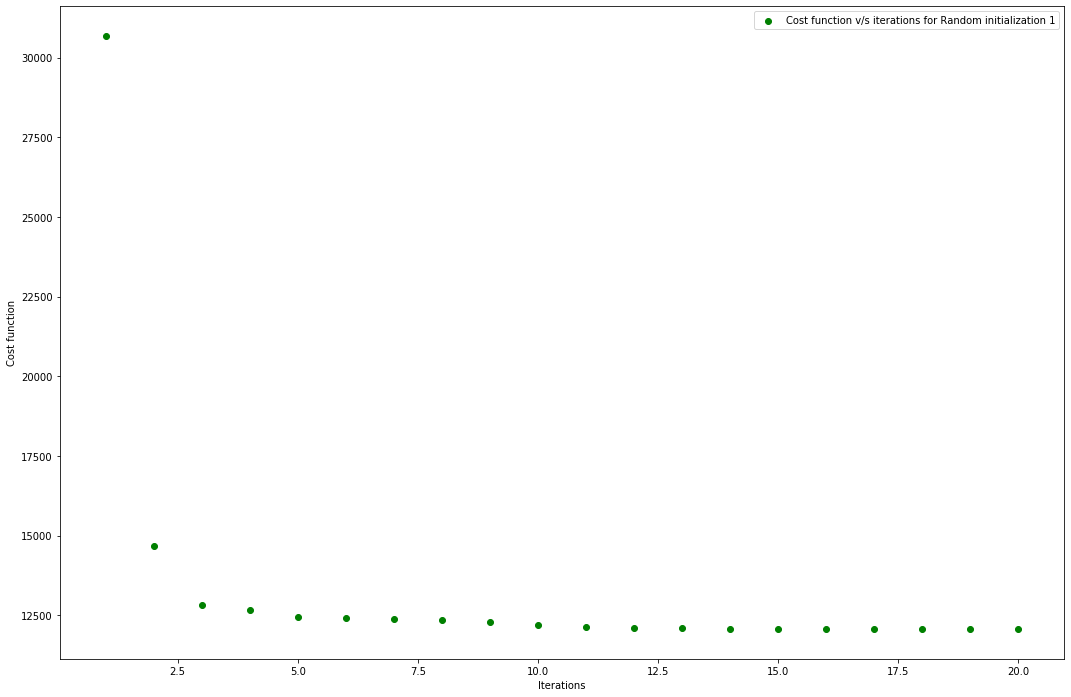

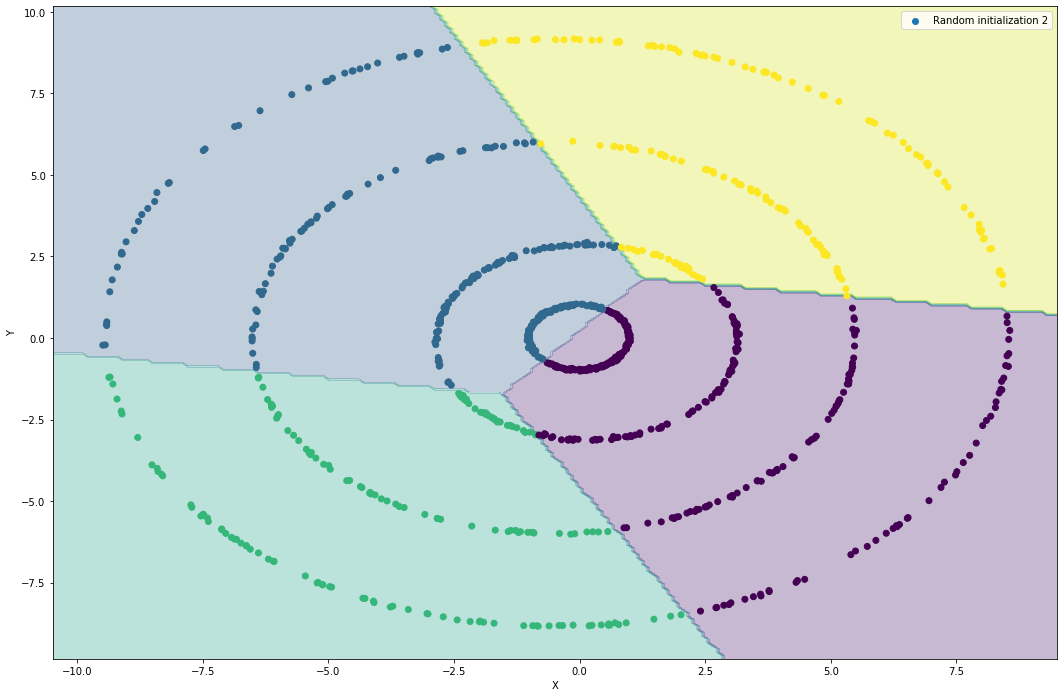

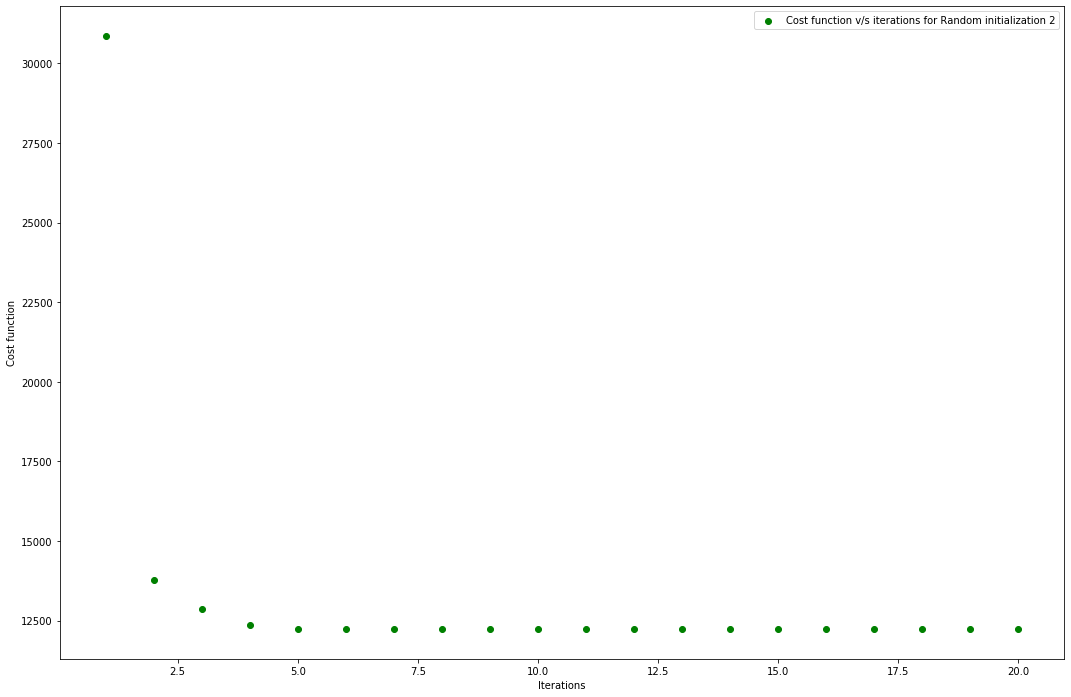

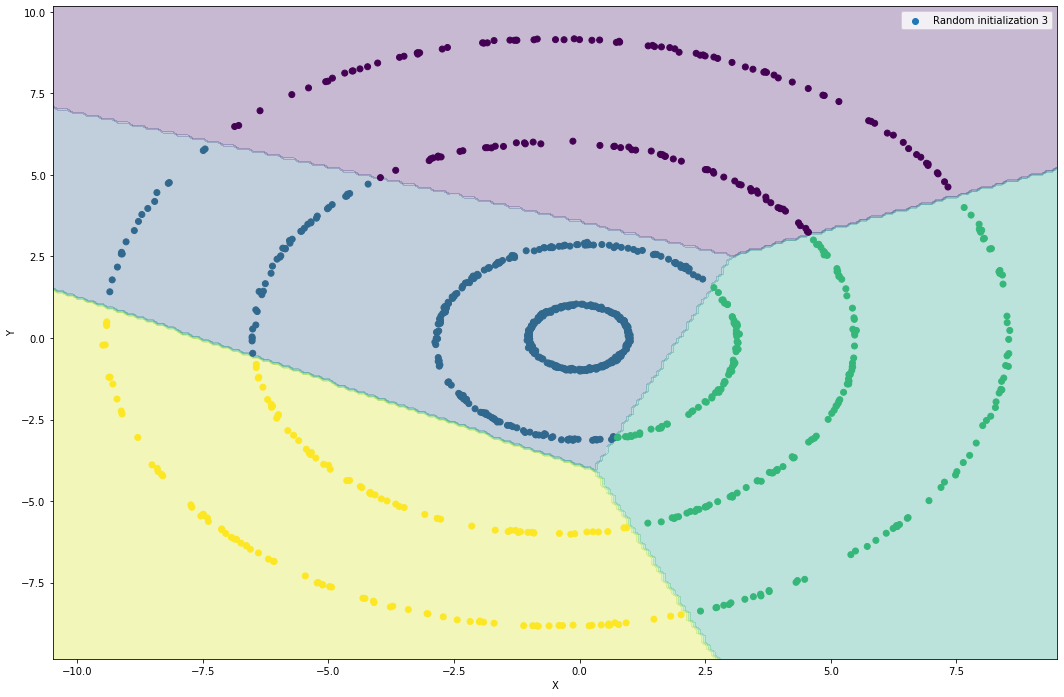

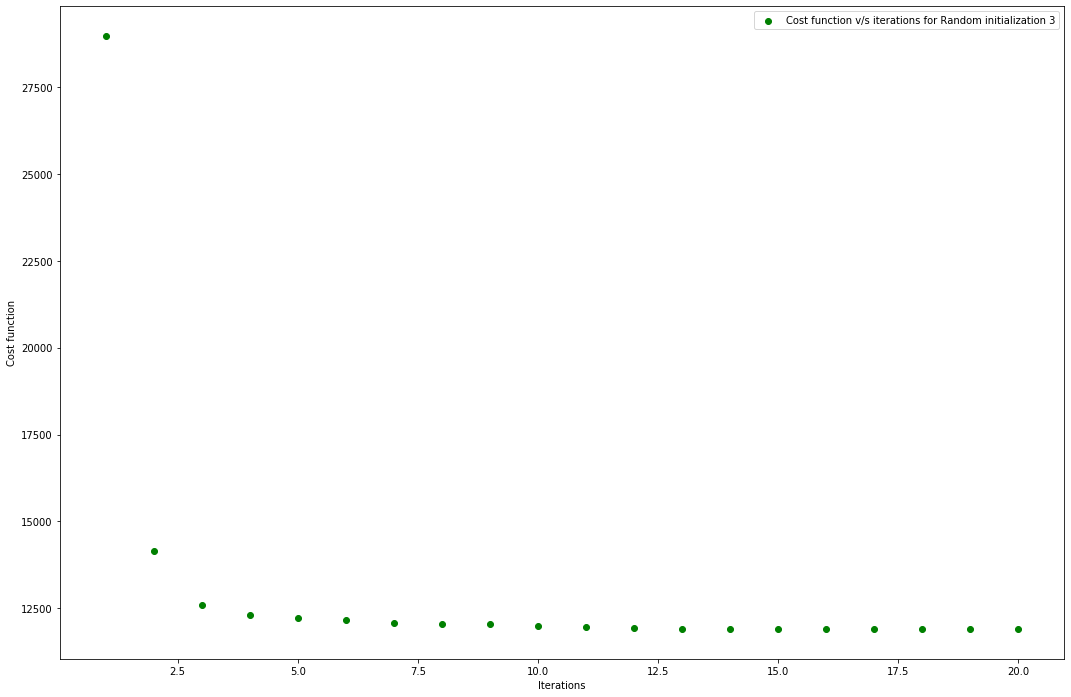

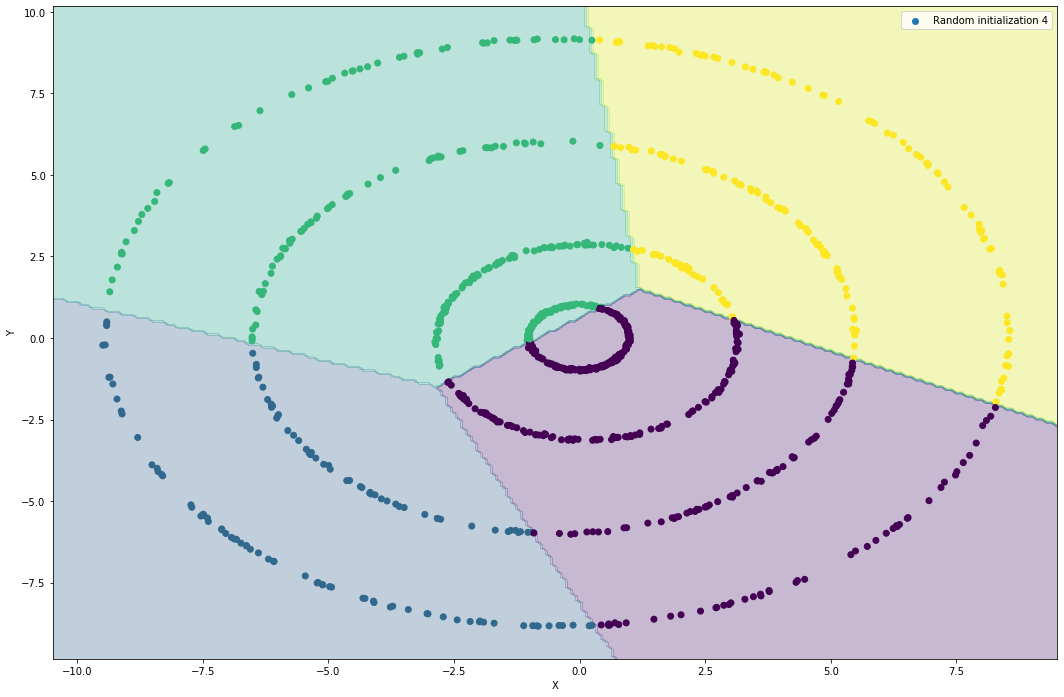

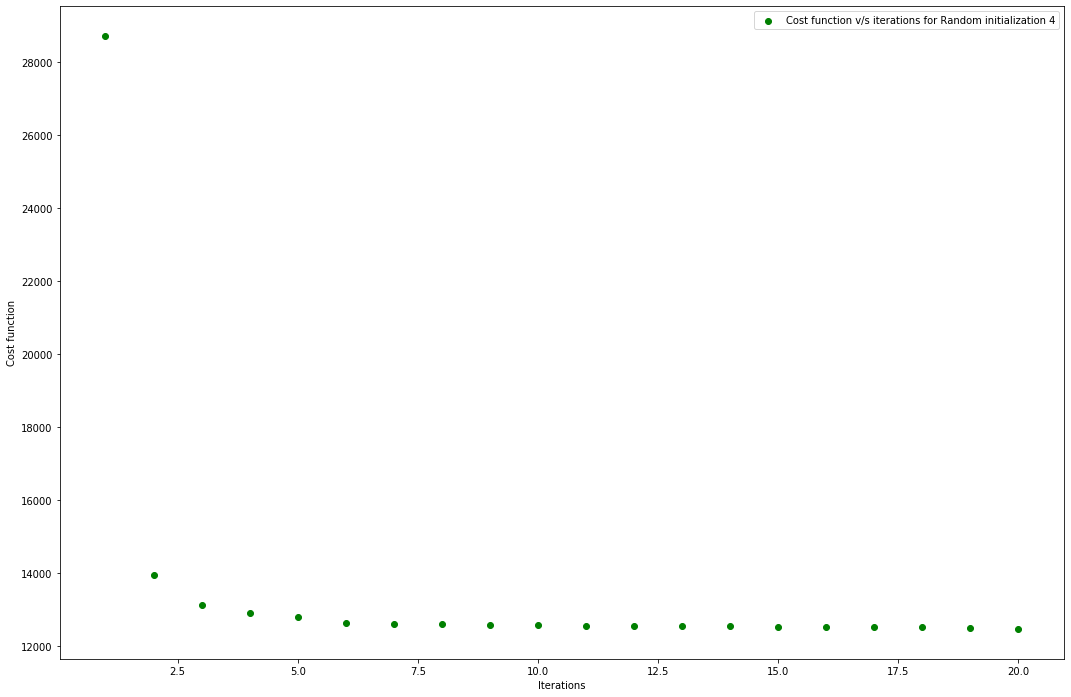

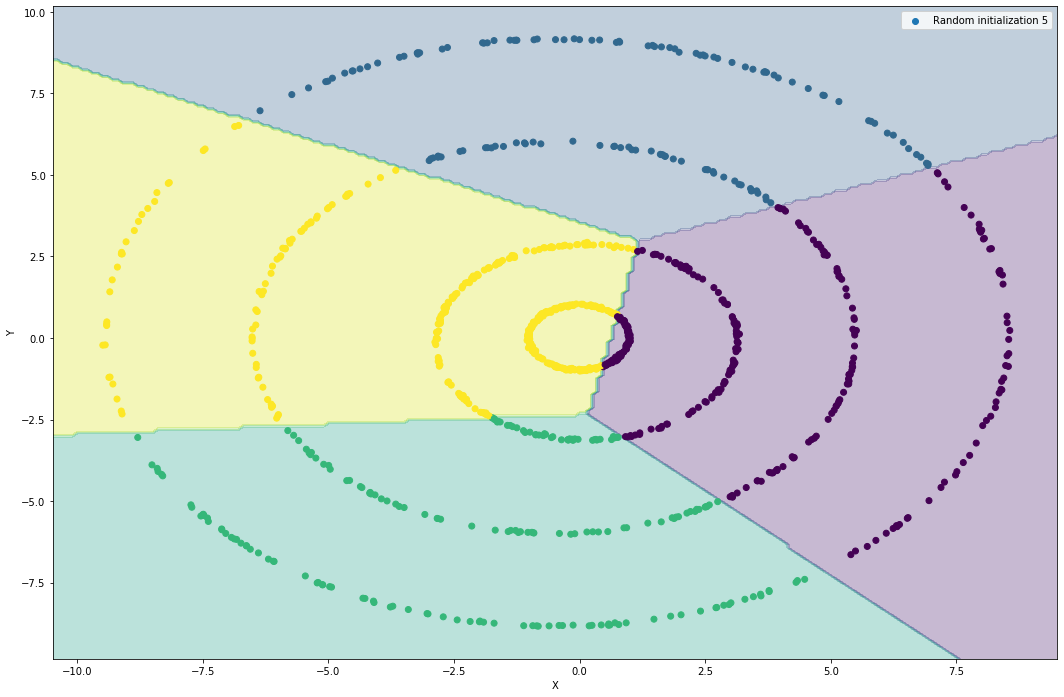

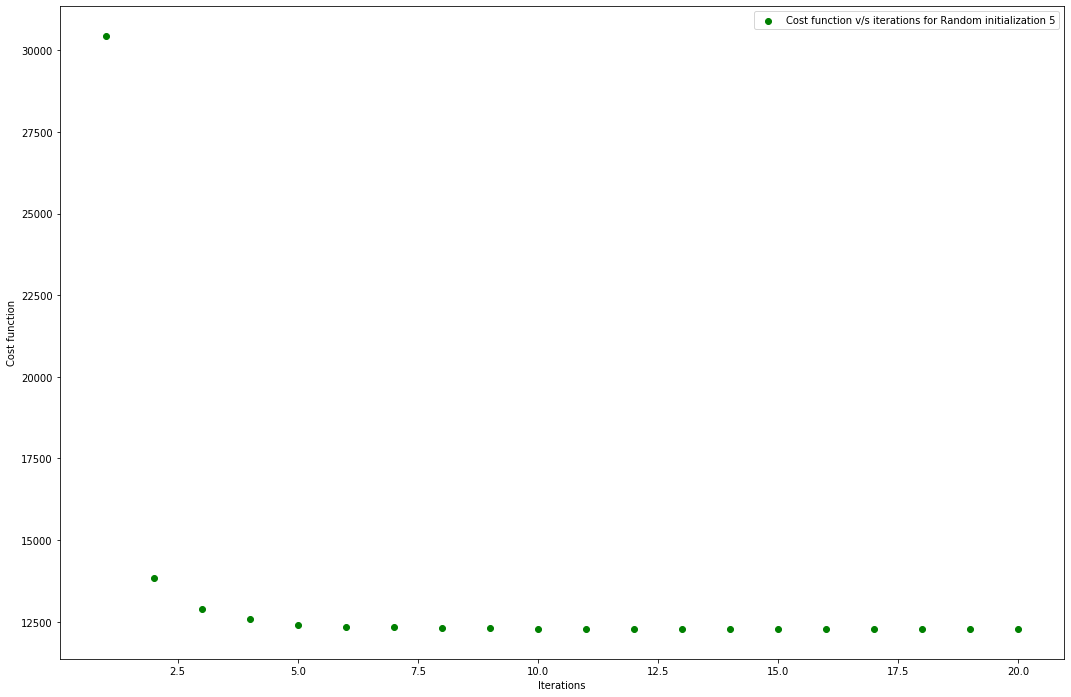

In [4]:
# plot for 5 different initilizations
for u in range(5):
    # fix a value of k
    k = 4
    # the k means algorithm for given k
    # Let us define and initialize some required arrays and matrices
    # membership vector members( 1 * num_data_points) contains the membership of each point
    cluster_members = np.zeros(len(data),dtype=int)
    # cluster_means (num of clusters * dim of data) contains the means of each cluster
    cluster_means = np.zeros((k,data.shape[1]))
    # predefine num of iterations
    num_iters = 20
    # do random initialzation of the members
    for i in range(len(cluster_members)):
        cluster_members[i] = i%k
    # randomly shuffle the numbers
    np.random.shuffle(cluster_members)
    # store the distortion measure in a list
    distortion_measure = []
    for i in range(num_iters):
        # initialise current distortion measure
        curr_cost = 0
        # M step : Update the cluster_means
        for j in range(len(cluster_means)):
            # check if slice is empty, if empty just use previous value of mean
            cluster_means[j] = np.mean(X[cluster_members==j],0) if len(X[cluster_members==j]) else cluster_means[j]
        # E step : Update the cluster_members
        for j in range(len(data)):
            cluster_members[j] = np.argmin(np.sum((cluster_means - X[j])**2,1))
            curr_cost += np.sum((cluster_means[cluster_members[j]] - X[j])**2)
        distortion_measure.append(curr_cost)
    # plot a decision region
    x_min,x_max = min(X[:,0])-1,max(X[:,0])+1
    y_min,y_max = min(X[:,1])-1,max(X[:,1])+1
    # create a grid of points for plotting decision regions
    x_plot,y_plot = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
    # create predictions for these points in grids
    data_plot = np.c_[x_plot.ravel(),y_plot.ravel()]
    pred_plot = np.zeros(len(data_plot),dtype=int)
    plt.figure(figsize=(18,12))
    for i in range(len(data_plot)):
        pred_plot[i] = np.argmin(np.sum((cluster_means - data_plot[i])**2,1))
    pred_plot = pred_plot.reshape(x_plot.shape)
    plt.contourf(x_plot,y_plot,pred_plot,alpha=0.3)
    plt.scatter(X[:,0],X[:,1],c=cluster_members,label = "Random initialization "+str(u+1))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()
    plt.figure(figsize=(18,12))
    plt.scatter(list(range(1,len(distortion_measure)+1)),distortion_measure,c='g',label="Cost function v/s iterations for Random initialization " + str(u+1))
    plt.xlabel("Iterations")
    plt.ylabel("Cost function")
    plt.legend()

Part (ii)

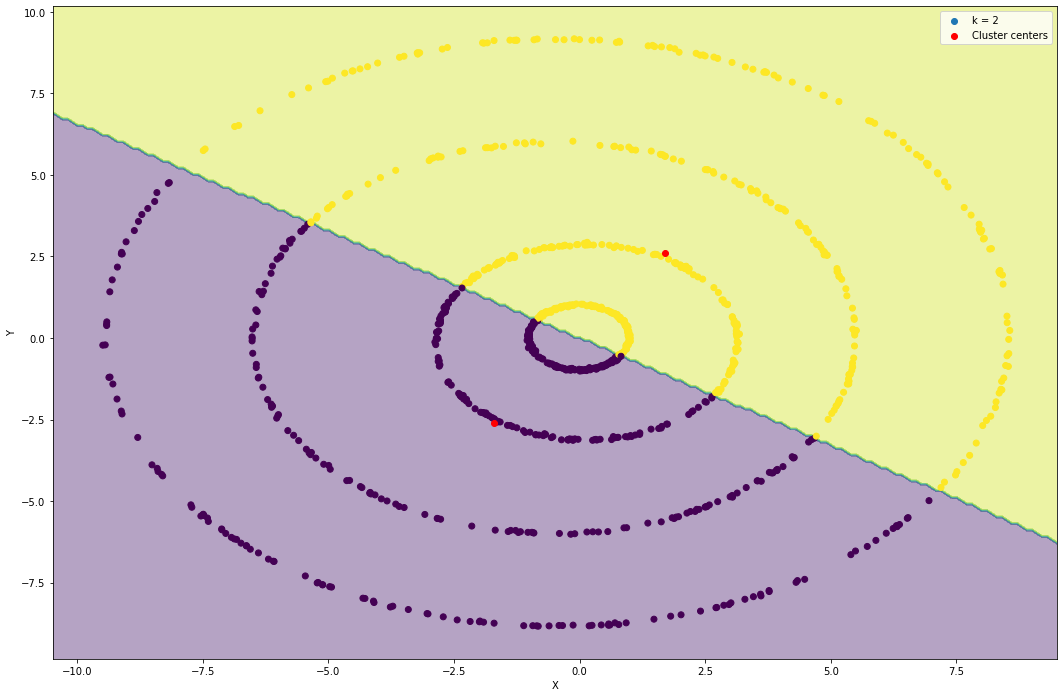

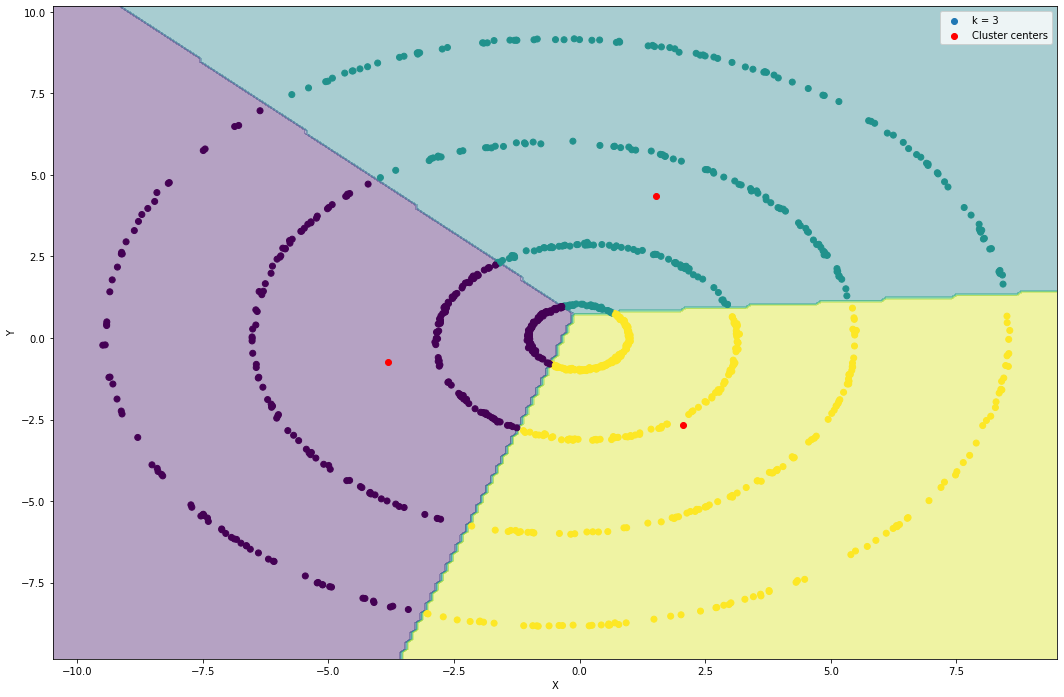

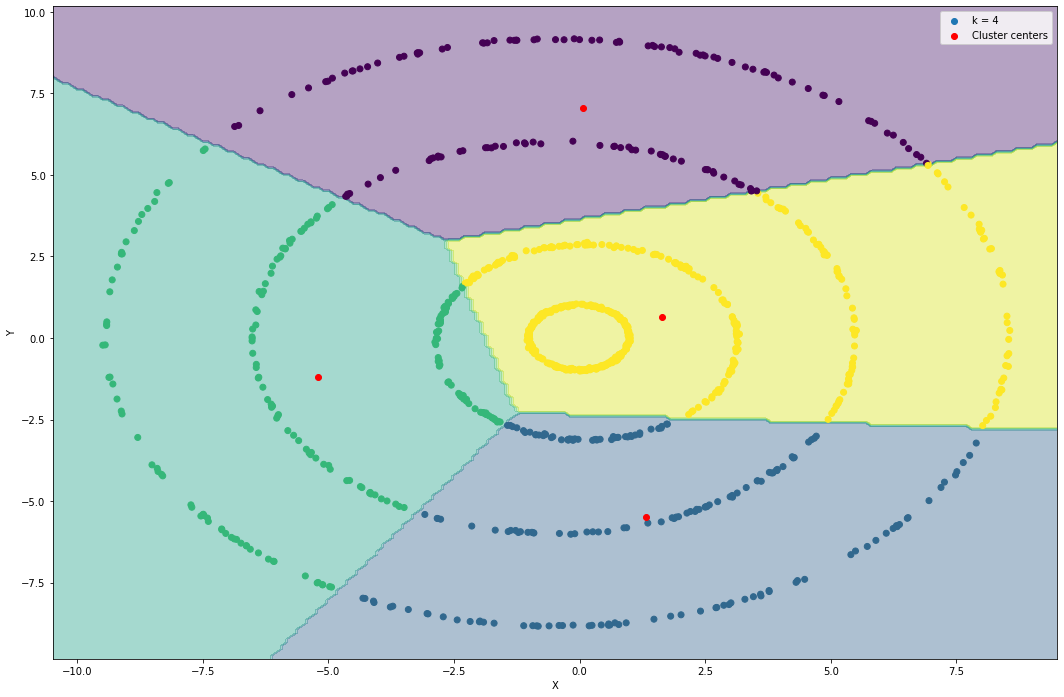

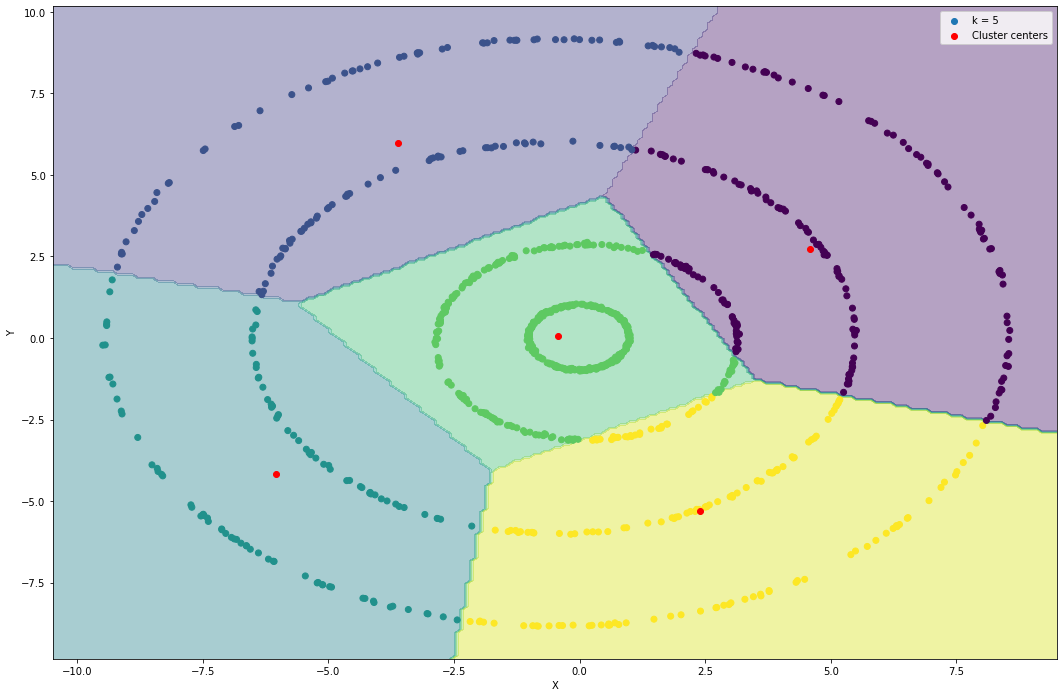

In [5]:
for k in [2,3,4,5]:
    cluster_members = np.zeros(len(data),dtype=int)
    # cluster_means (num of clusters * dim of data) contains the means of each cluster
    cluster_means = np.zeros((k,data.shape[1]))
    # predefine num of iterations
    num_iters = 20
    # do random initialzation of the members
    for i in range(len(cluster_members)):
        cluster_members[i] = i%k
    # randomly shuffle the numbers
    # this initialization is fixed for this particular k
    np.random.shuffle(cluster_members)
    # store the distortion measure in a list
    distortion_measure = []
    for i in range(num_iters):
        # initialise current distortion measure
        curr_cost = 0
        # M step : Update the cluster_means
        for j in range(len(cluster_means)):
            cluster_means[j] = np.mean(X[cluster_members==j],0) if len(X[cluster_members==j]) else cluster_means[j]
        # E step : Update the cluster_members
        for j in range(len(data)):
            cluster_members[j] = np.argmin(np.sum((cluster_means - X[j])**2,1))
            curr_cost += np.sum((cluster_means[cluster_members[j]] - X[j])**2)
        distortion_measure.append(curr_cost)
    plt.figure(figsize=(18,12))
    x_min,x_max = min(X[:,0])-1,max(X[:,0])+1
    y_min,y_max = min(X[:,1])-1,max(X[:,1])+1
    # create a grid of points for plotting decision regions
    x_plot,y_plot = np.meshgrid(np.arange(x_min,x_max,0.1),np.arange(y_min,y_max,0.1))
    # create predictions for these points in grids
    data_plot = np.c_[x_plot.ravel(),y_plot.ravel()]
    pred_plot = np.zeros(len(data_plot),dtype=int)
    for i in range(len(data_plot)):
        pred_plot[i] = np.argmin(np.sum((cluster_means - data_plot[i])**2,1))
    pred_plot = pred_plot.reshape(x_plot.shape)
    plt.contourf(x_plot,y_plot,pred_plot,alpha=0.4)
    plt.scatter(X[:,0],X[:,1],c=cluster_members,label="k = "+str(k))
    plt.scatter(cluster_means[:,0],cluster_means[:,1],c='r',label="Cluster centers")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()

Part (iii)

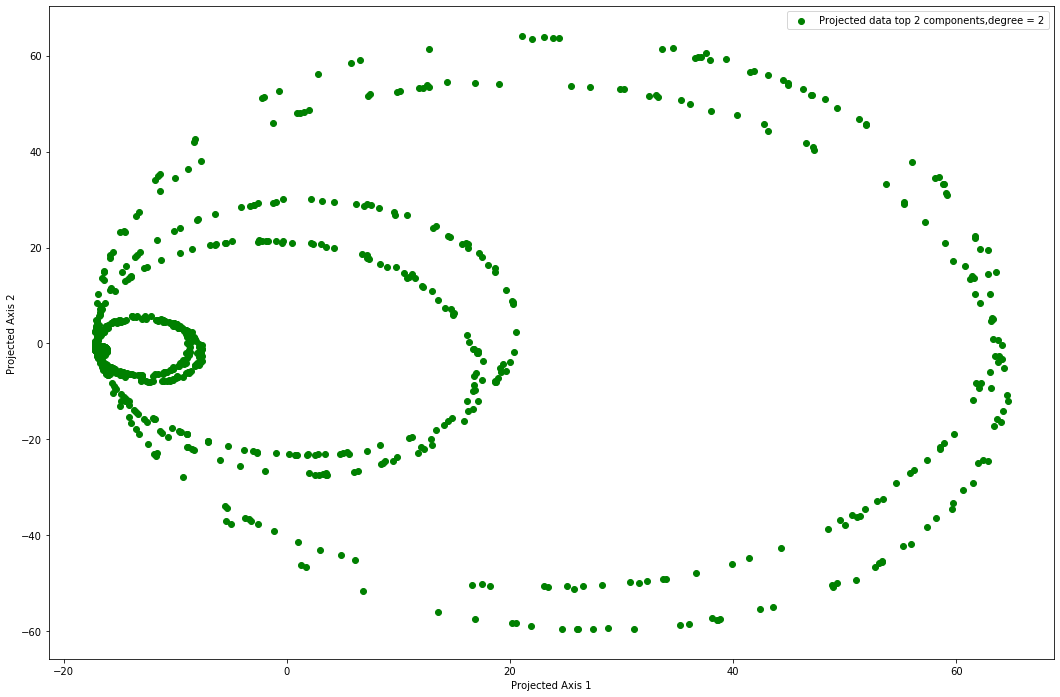

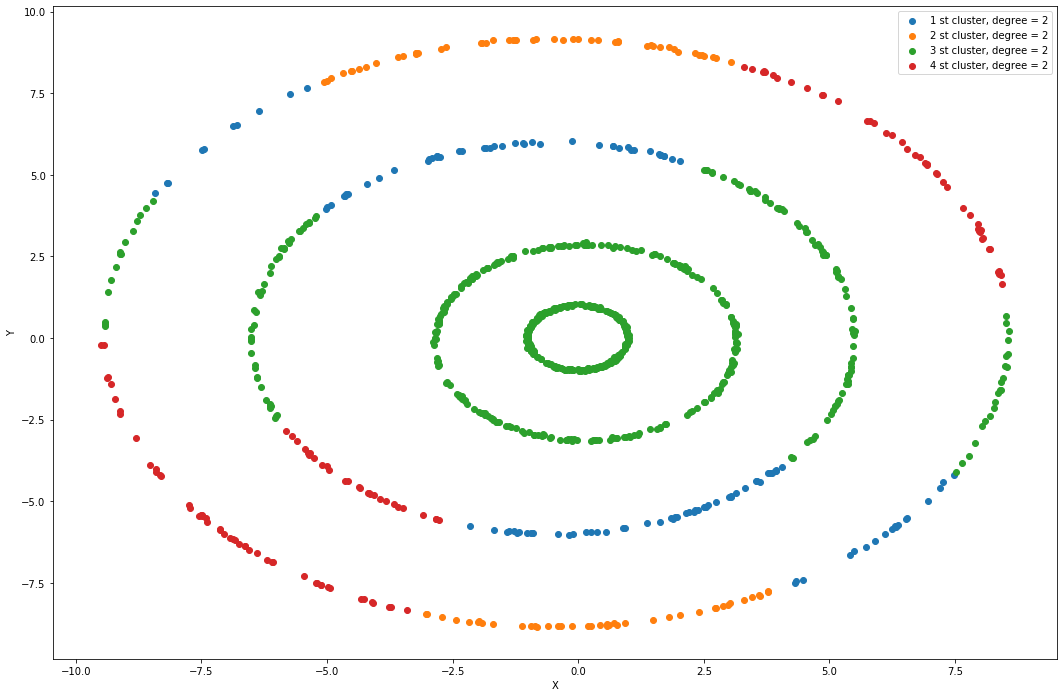

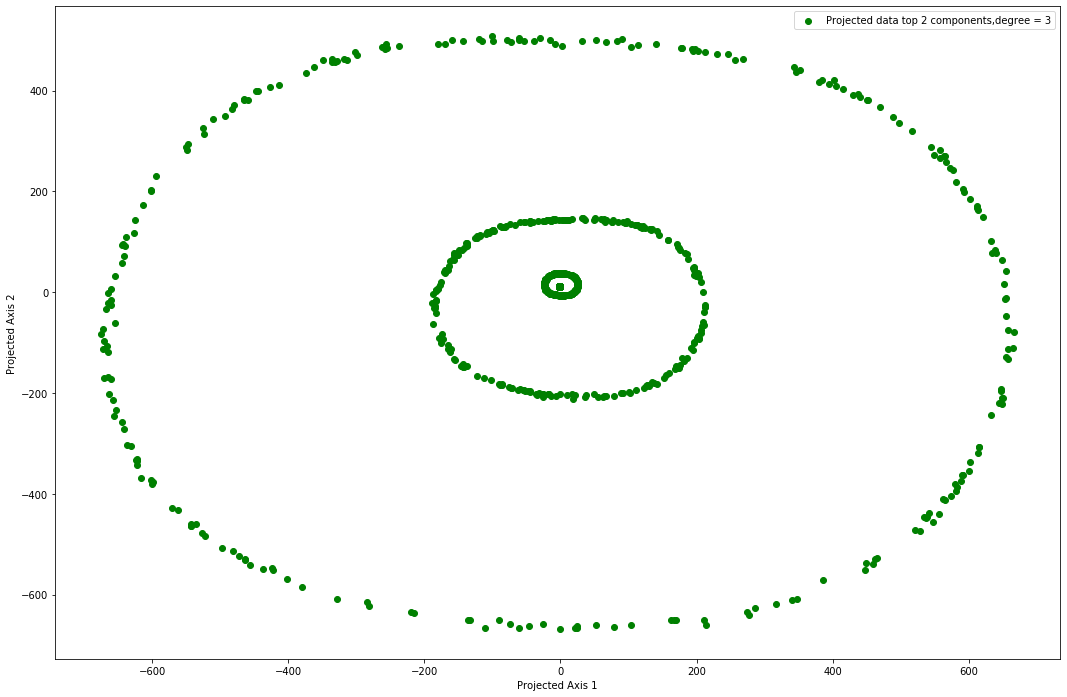

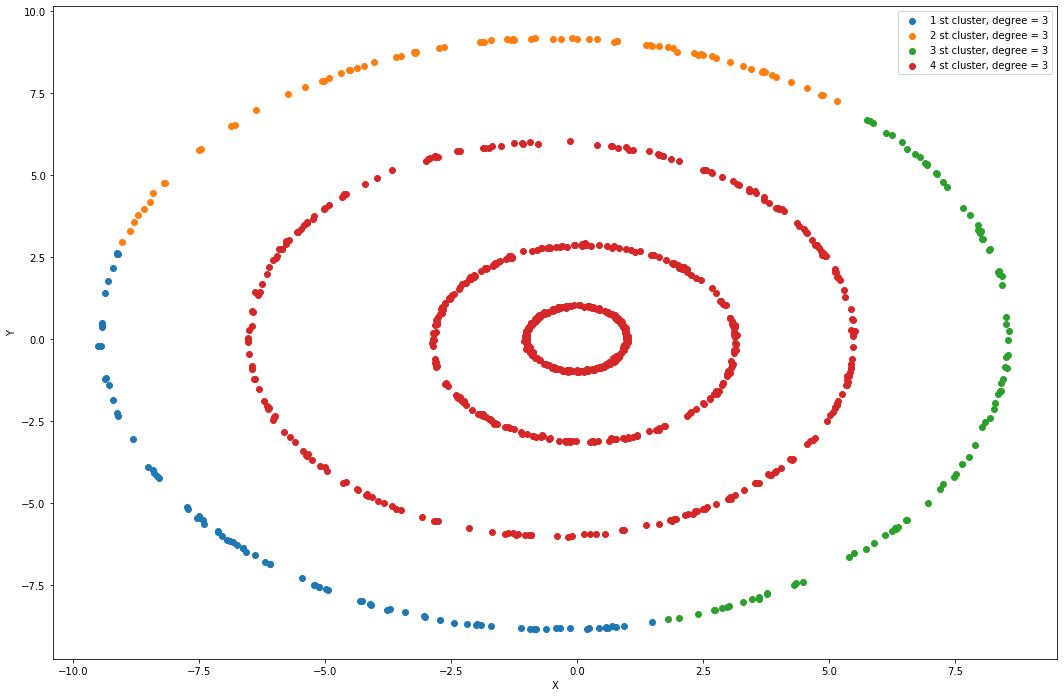

In [7]:
## Kernel PCA from previous assignment
## Polynomial kernel
dim = 2
# center the data
for degree in [2,3]:
    X -= np.mean(X,0)
    # compute the kernel matrix
    kernel_matrix = (1 + X @ X.T)**degree
    # center the kernel matrix
    one_n = np.ones(kernel_matrix.shape) / len(X)
    centered_kernel_matrix = kernel_matrix - one_n@kernel_matrix - kernel_matrix@one_n + one_n@kernel_matrix@one_n
    # get the eigenvalues and eigenvectors of the kernel matrix
    eigen_values = np.linalg.eigh(centered_kernel_matrix)[0][-dim:][::-1]
    eigen_vectors = np.linalg.eigh(centered_kernel_matrix)[1][:,-dim:]
    # swap the columns, to get the greatest eigenvector first
    eigen_vectors[:,list(range(dim))] = eigen_vectors[:,list(reversed(list(range(dim))))]
    # scale the eigenvectors to get transformed data
    trans_data = eigen_vectors * np.sqrt(eigen_values)
    plt.figure(figsize=(18,12))
    plt.scatter(trans_data[:,0],trans_data[:,1],c='g',label="Projected data top 2 components,degree = "+str(degree))
    plt.xlabel("Projected Axis 1")
    plt.ylabel("Projected Axis 2")
    plt.legend()
    ## Run k means now on the transformed data
    k = 4
    cluster_members = np.zeros(len(data),dtype=int)
    # cluster_means (num of clusters * dim of data) contains the means of each cluster
    cluster_means = np.zeros((k,dim))
    # predefine num of iterations
    num_iters = 20
    # do random initialzation of the members
    for i in range(len(cluster_members)):
        cluster_members[i] = i%k
    # randomly shuffle the numbers
    np.random.shuffle(cluster_members)
    # store the distortion measure in a list
    distortion_measure = []
    for i in range(num_iters):
        # initialise current distortion measure
        curr_cost = 0
        # M step : Update the cluster_means
        for j in range(len(cluster_means)):
            cluster_means[j] = np.mean(trans_data[cluster_members==j],0) if len(trans_data[cluster_members==j]) else cluster_means[j]
        # E step : Update the cluster_members
        for j in range(len(data)):
            cluster_members[j] = np.argmin(np.sum((cluster_means - trans_data[j])**2,1))
            curr_cost += np.sum((cluster_means[cluster_members[j]] - trans_data[j])**2)
        distortion_measure.append(curr_cost)
    plt.figure(figsize=(18,12))
    for i in range(k):
        plt.scatter(X[:,0][cluster_members == i],X[:,1][cluster_members == i],label=str(i+1)+" st cluster, degree = "+str(degree))
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.legend()

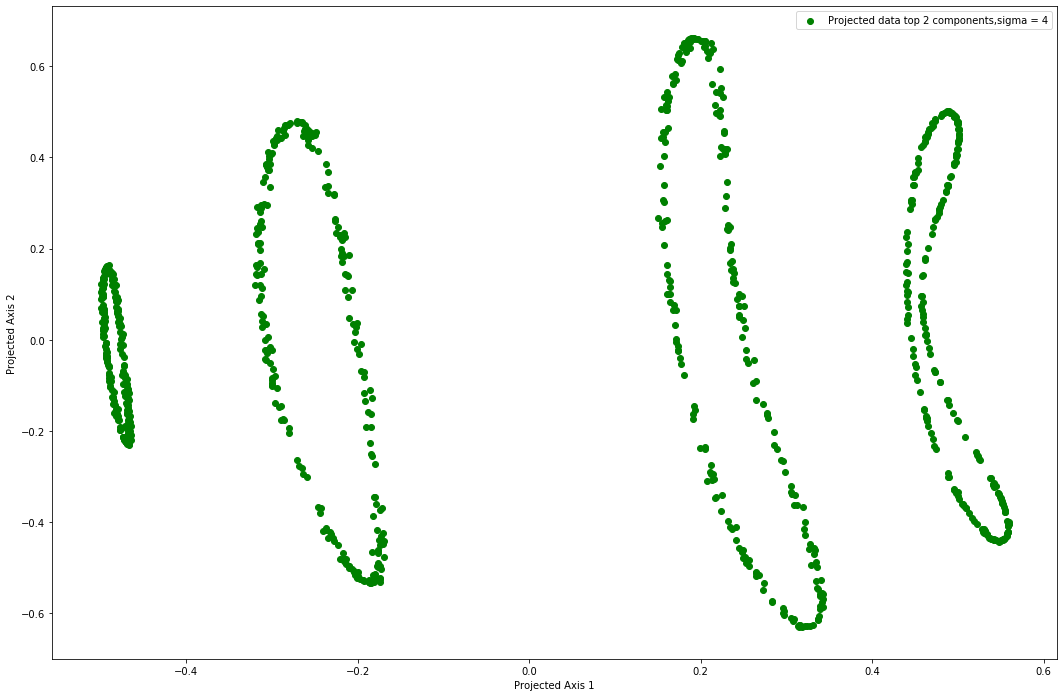

In [8]:
# loop over values of sigma
sigma = 4
dim = 2
# vectorized implementation of the kernel matrix
kernel_matrix = np.exp(-(np.sum(X**2,1).reshape(-1,1) + np.sum(X**2,1).reshape(1,-1) - 2*X @ X.T)/(2*sigma**2))
# we now have to center the kernel matrix
one_n = np.ones(kernel_matrix.shape) / len(kernel_matrix)
# center the kernel matrix
centered_kernel_matrix = kernel_matrix - one_n@kernel_matrix - kernel_matrix@one_n + one_n@kernel_matrix@one_n
# do eigenvalue deomposition
eigen_values = np.linalg.eigh(centered_kernel_matrix)[0][-dim:][::-1]
eigen_vectors = np.linalg.eigh(centered_kernel_matrix)[1][:,-dim:]
# swap the columns, to get the greatest eigenvector first
eigen_vectors[:,list(range(dim))] = eigen_vectors[:,list(reversed(list(range(dim))))]
trans_data = eigen_vectors * np.sqrt(eigen_values)
plt.figure(figsize=(18,12))
plt.scatter(trans_data[:,0],trans_data[:,1],c='g',label="Projected data top 2 components,sigma = "+str(sigma))
plt.xlabel("Projected Axis 1")
plt.ylabel("Projected Axis 2")
plt.legend()

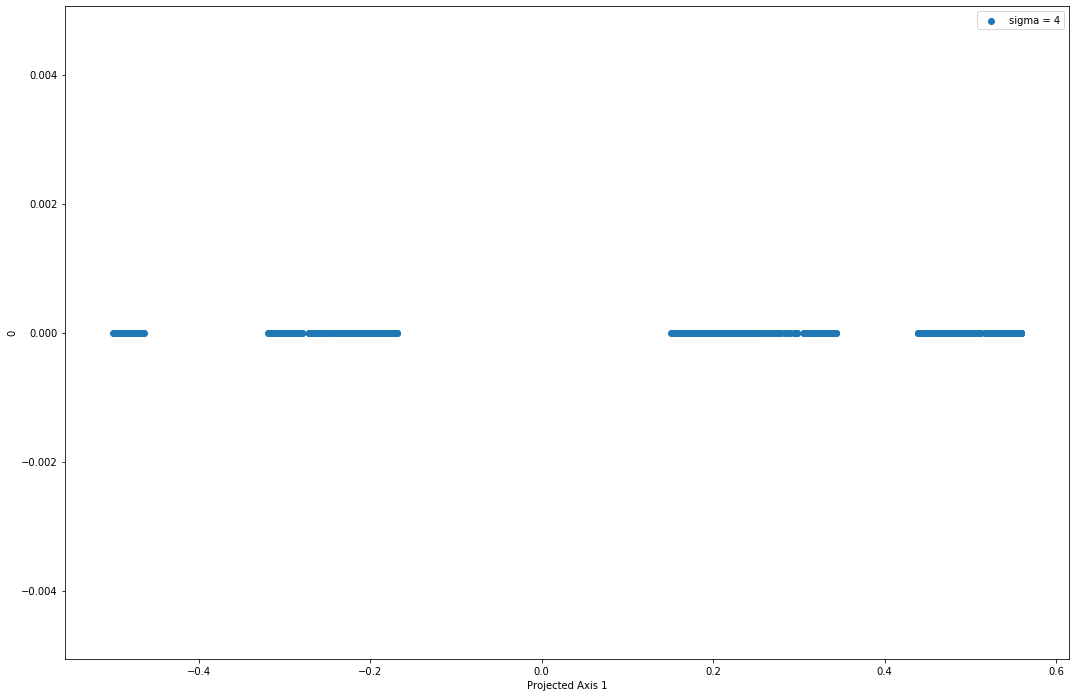

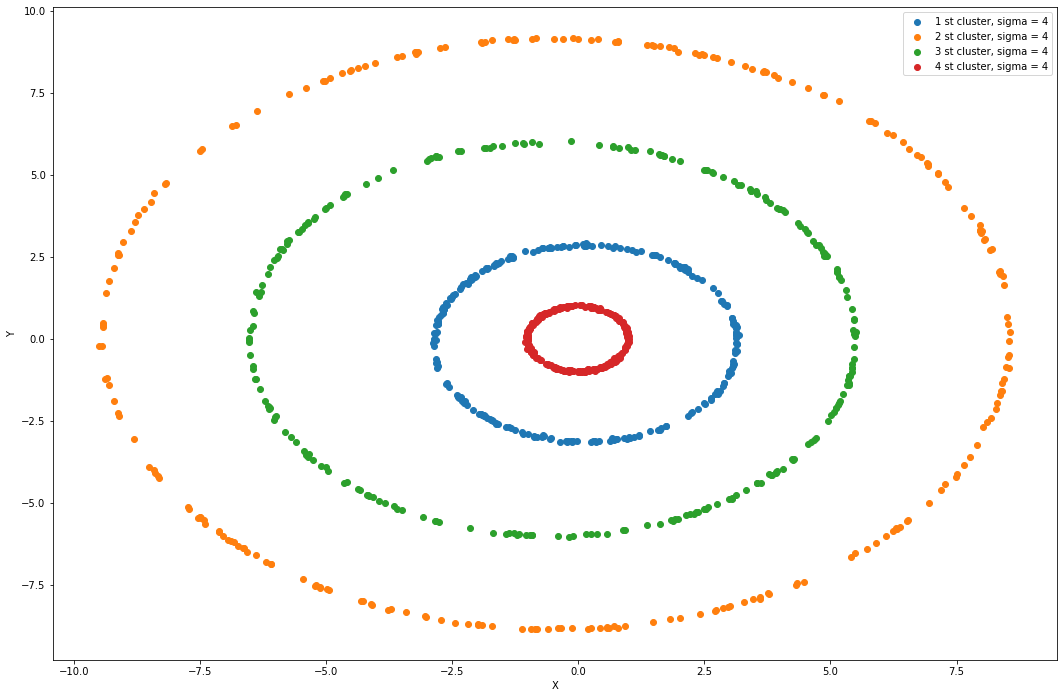

In [9]:
# Gaussian Kernel
sigma = 4
dim = 1
# vectorized implementation of the kernel matrix
kernel_matrix = np.exp(-(np.sum(X**2,1).reshape(-1,1) + np.sum(X**2,1).reshape(1,-1) - 2*X @ X.T)/(2*sigma**2))
# we now have to center the kernel matrix
one_n = np.ones(kernel_matrix.shape) / len(kernel_matrix)
# center the kernel matrix
centered_kernel_matrix = kernel_matrix - one_n@kernel_matrix - kernel_matrix@one_n + one_n@kernel_matrix@one_n
# do eigenvalue deomposition
eigen_values = np.linalg.eigh(centered_kernel_matrix)[0][-dim:][::-1]
eigen_vectors = np.linalg.eigh(centered_kernel_matrix)[1][:,-dim:]
# swap the columns, to get the greatest eigenvector first
eigen_vectors[:,list(range(dim))] = eigen_vectors[:,list(reversed(list(range(dim))))]
trans_data = eigen_vectors * np.sqrt(eigen_values)
plt.figure(figsize=(18,12))
plt.scatter(trans_data,[0]*len(trans_data),label="sigma = 4")
plt.xlabel("Projected Axis 1")
plt.ylabel("0")
plt.legend()
## Run k means now on the transformed data
k = 4
cluster_members = np.zeros(len(trans_data),dtype=int)
# cluster_means (num of clusters * dim of data) contains the means of each cluster
cluster_means = np.zeros((k,trans_data.shape[1]))
# predefine num of iterations
num_iters = 50
# do random initialzation of the members
for i in range(len(cluster_members)):
    cluster_members[i] = i%k
# randomly shuffle the numbers
np.random.shuffle(cluster_members)
# store the distortion measure in a list
distortion_measure = []
for i in range(num_iters):
    # initialise current distortion measure
    curr_cost = 0
    # M step : Update the cluster_means
    for j in range(len(cluster_means)):
        cluster_means[j] = np.mean(trans_data[cluster_members==j],0) if len(trans_data[cluster_members==j]) else cluster_means[j]
    # E step : Update the cluster_members
    for j in range(len(data)):
        cluster_members[j] = np.argmin(np.sum((cluster_means - trans_data[j])**2,1))
        curr_cost += np.sum((cluster_means[cluster_members[j]] - trans_data[j])**2)
    distortion_measure.append(curr_cost)
plt.figure(figsize=(18,12))
for i in range(k):
    plt.scatter(X[:,0][cluster_members == i],X[:,1][cluster_members == i],label=str(i+1)+" st cluster, sigma = "+str(sigma))
plt.xlabel("X")
plt.ylabel("Y")
plt.legend()

## Question 2

In [106]:
# load the data
data = pd.read_csv("Dataset_train.csv",header=None)
X = data[list(range(100))].values
y = data[100].values.reshape(-1,1)

Part (i)

In [30]:
beta = np.linalg.inv(X.T @ X) @ X.T @ y

In [31]:
# first five beta coefficents for reference
beta[:5]

array([[-0.00784961],
       [-0.01367153],
       [-0.00361656],
       [ 0.00264909],
       [ 0.18855145]])

Part (ii)

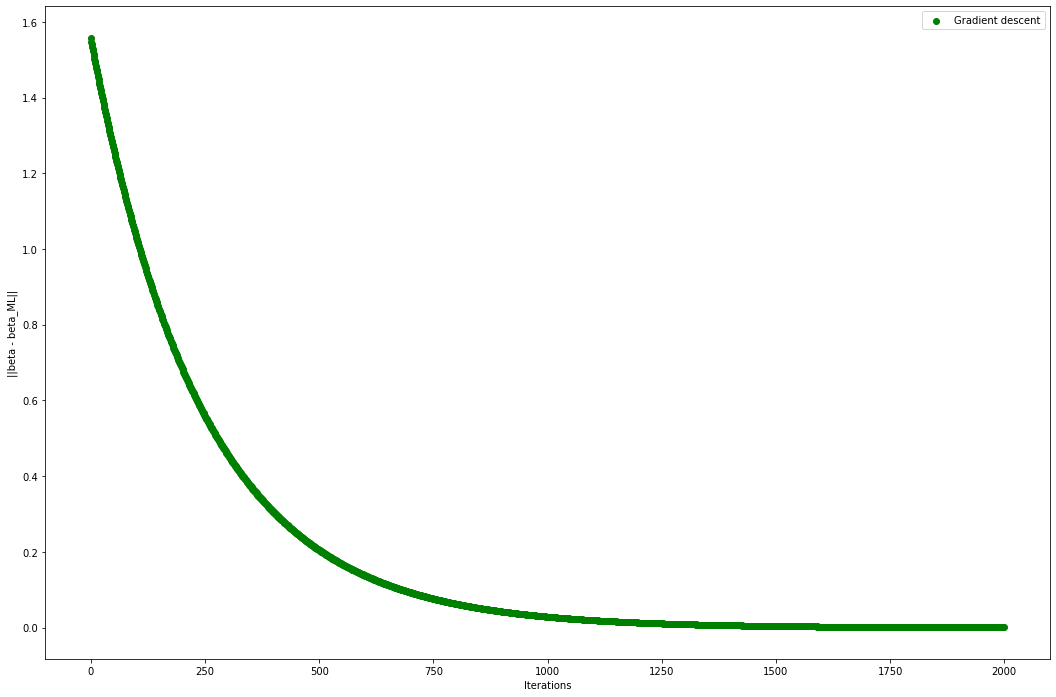

In [32]:
# define number of iterations
num_iter = 2000
# initialise betas
beta_curr = np.zeros((X.shape[1],1))
# define step size
neta = 5e-6
# store differences in the norm
diff_norm = []
for i in range(num_iter):
    beta_curr = beta_curr - neta * (X.T@(X@beta_curr - y))
    diff_norm.append(np.linalg.norm(beta - beta_curr))
plt.figure(figsize=(18,12))
plt.scatter(list(range(len(diff_norm))),diff_norm,c='g',label="Gradient descent")
plt.xlabel("Iterations")
plt.ylabel("||beta - beta_ML||")
plt.legend()

Part (iii)

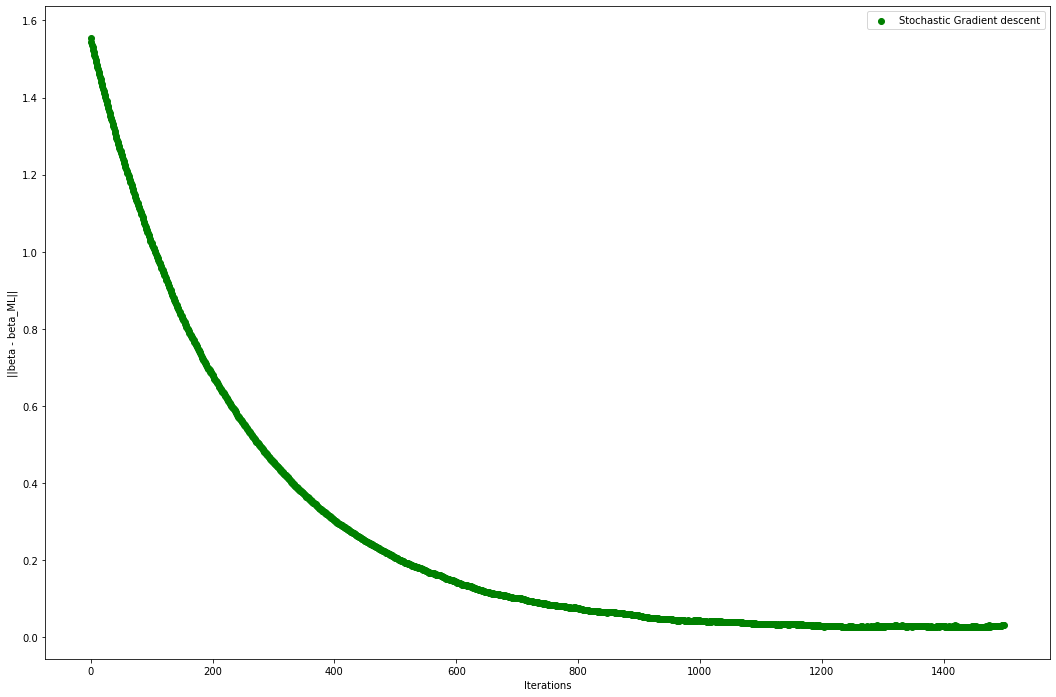

In [33]:
# define number of iterations
num_iter = 1500
# initialise betas
beta_curr = np.zeros((X.shape[1],1))
# define step size
neta = 5e-4
diff_norm = []
for i in range(num_iter):
    # random sampling of points
    curr_batch = np.random.choice(len(X),100,replace=False)
    beta_curr = beta_curr - neta * (X[curr_batch].T@(X[curr_batch]@beta_curr - y[curr_batch]))
    diff_norm.append(np.linalg.norm(beta - beta_curr))
plt.figure(figsize=(18,12))
plt.scatter(list(range(len(diff_norm))),diff_norm,c='g',label="Stochastic Gradient descent")
plt.xlabel("Iterations")
plt.ylabel("||beta - beta_ML||")
plt.legend()

## Question 3

Part (i)

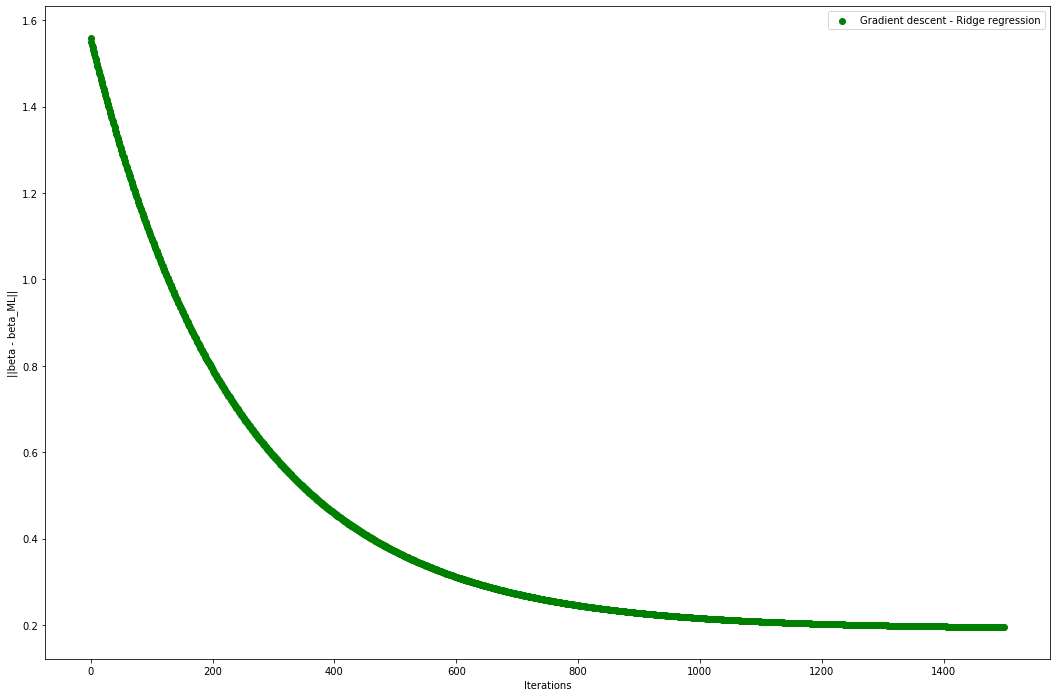

In [34]:
# define number of iterations
num_iter = 1500
# initialise betas
beta_curr = np.zeros((X.shape[1],1))
# define step size
neta = 5e-6
lam = 100
diff_norm = []
for i in range(num_iter):
    beta_curr = beta_curr - neta * (X.T@(X@beta_curr - y) + lam*beta)
    diff_norm.append(np.linalg.norm(beta - beta_curr))
plt.figure(figsize=(18,12))
plt.scatter(list(range(len(diff_norm))),diff_norm,c='g',label="Gradient descent - Ridge regression")
plt.xlabel("Iterations")
plt.ylabel("||beta - beta_ML||")
plt.legend()

Part (ii)

In [57]:
# let us create a validation set of 20%
validation_indices = np.random.choice(len(X),int(0.2*len(X)),replace=False)
X_val,y_val = X[validation_indices],y[validation_indices]
X_train,y_train = X[list(set(range(len(X))) - set(validation_indices))],y[list(set(range(len(X))) - set(validation_indices))]

In [75]:
# import test data
data_test = pd.read_csv("Dataset_test.csv",header=None)
X_test = data_test[list(range(100))].values
y_test = data_test[100].values.reshape(-1,1)

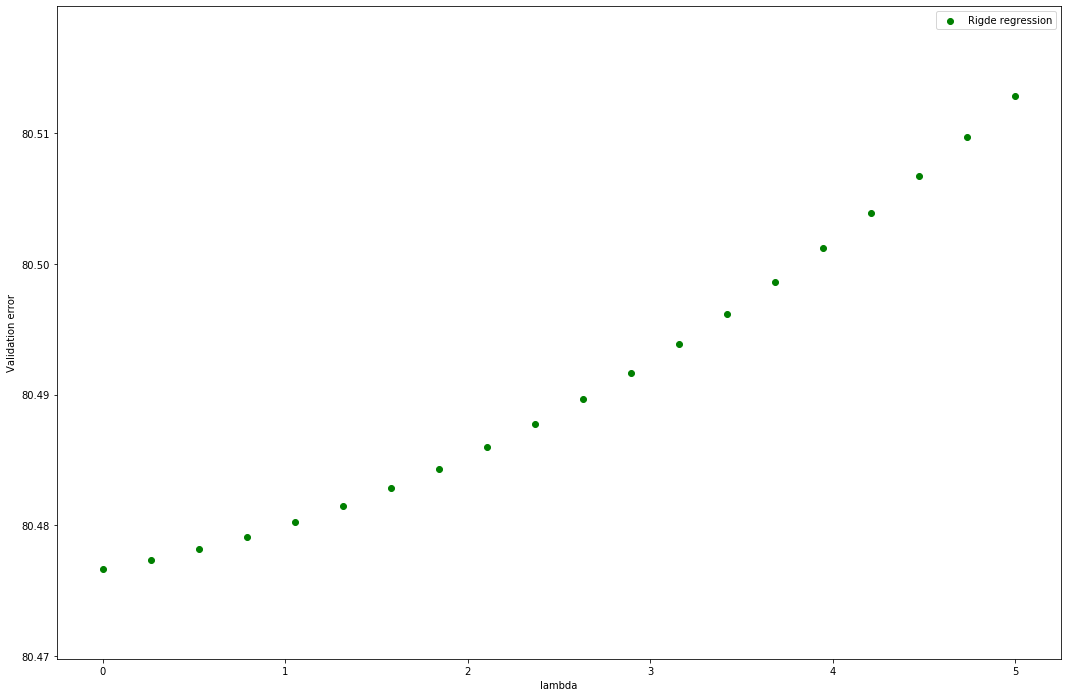

In [74]:
num_iter = 2000
neta = 5e-6
# store the val error
val_error = []
# let us determine the validation error for various lambda values
for lam in np.linspace(0,5,20):
    beta_curr = np.zeros((X_train.shape[1],1))
    # do training on the training set
    for i in range(num_iter):
        beta_curr = beta_curr - neta * (X_train.T@(X_train@beta_curr - y_train) + lam*beta)
    # use validation set to evaluate model performance
    val_error.append(np.linalg.norm(X_val@beta_curr - y_val)**2)
plt.figure(figsize=(18,12))
plt.scatter(np.linspace(0,5,20),val_error,c="g",label="Rigde regression")
plt.xlabel("lambda")
plt.ylabel("Validation error")
plt.legend()

Therefore optimal value of $\lambda$ is 0, which makes it same as $w_{ML}$.<br>
Let us determine the validation and test error of $w_{ML}$

In [76]:
# validation error and test error for vanilla regression
beta = np.linalg.inv(X_train.T @ X_train) @ X_train.T @ y_train
print("validation error: ",np.linalg.norm(X_val@beta - y_val)**2,"\ntest error: ",np.linalg.norm(X_test@beta - y_test)**2)

validation error:  80.454963474763 
test error:  185.37790336131047


Part (iii)

Coordinate gradient descent for LASSO

In [141]:
# coordinate descent for lasso regression
def evaluate_cases(lam,coeff):
    if coeff > lam:
        return coeff-lam
    elif coeff < -lam:
        return coeff+lam
    else:
        return 0
# define number of iterations
num_iter = 1000
# initialise betas
beta_curr = np.zeros((X.shape[1],1))
# initialse lambda
lam = 1000
# normalise X
X = X/(np.linalg.norm(X,axis = 0))
for i in range(num_iter):
    for y_cord in range(X.shape[1]):
        coeff = X[:,y_cord].reshape(1,-1) @ (y - X@beta_curr+beta_curr[y_cord]*X[:,y_cord].reshape(-1,1))
        beta_curr[y_cord] = evaluate_cases(lam,coeff)

In [142]:
np.linalg.norm(X_test@beta_curr - y_test)**2

2549.6020540421005

Cross validation code:


In [138]:
num_iter = 1000
# store the val error
val_error = []
# normalise X_train values for numerical stability
X_train = X_train/(np.linalg.norm(X_train,axis = 0))
# let us determine the validation error for various lambda values
for lam in np.linspace(0,100,5):
    beta_curr = np.zeros((X_train.shape[1],1))
    # do training on the training set
    for i in range(num_iter):
        for y_cord in range(X_train.shape[1]):
            coeff = X_train[:,y_cord].reshape(1,-1) @ (y_train - X_train@beta_curr+beta_curr[y_cord]*X_train[:,y_cord].reshape(-1,1))
            beta_curr[y_cord] = evaluate_cases(lam,coeff)
    # use validation set to evaluate model performance
    val_error.append(np.linalg.norm(X_val@beta_curr - y_val)**2)
    print(lam)

0.0
25.0
50.0
75.0
100.0


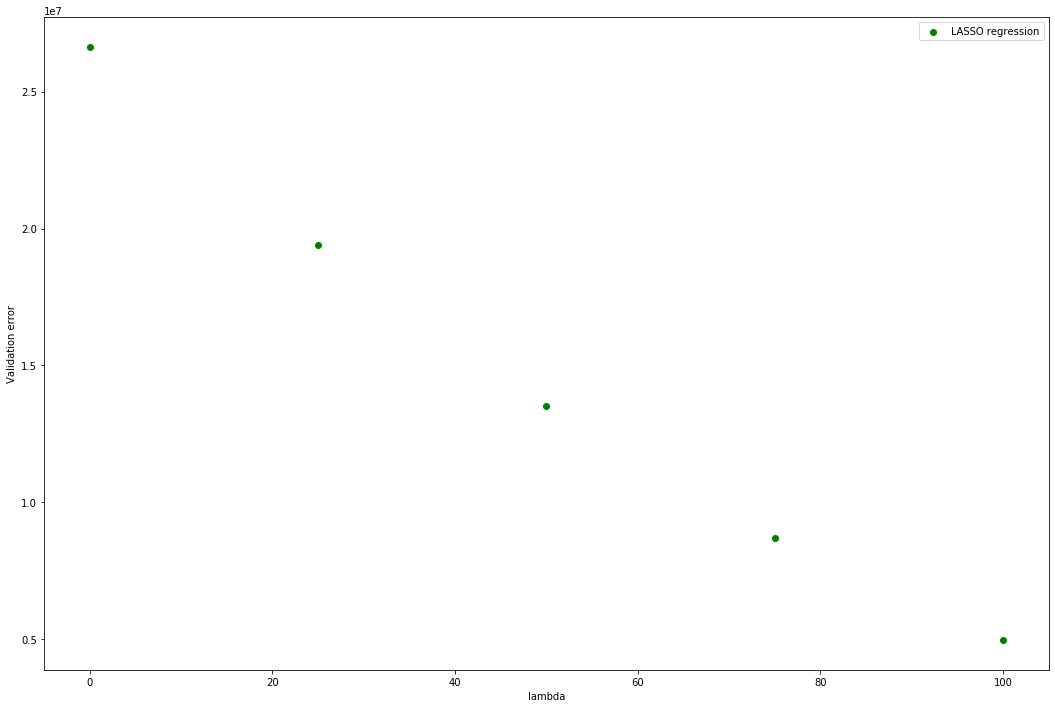

In [140]:
plt.figure(figsize=(18,12))
plt.scatter(np.linspace(0,100,5),val_error,c="g",label="LASSO regression")
plt.xlabel("lambda")
plt.ylabel("Validation error")
plt.legend()